Ejemplo PCA (https://cienciadedatos.net/documentos/py19-pca-python)
Librerías

Las librerías utilizadas en este documento son:

In [2]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import seaborn as sns
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

Datos


El set de datos USArrests contiene el porcentaje de asaltos (Assault), asesinatos (Murder) y secuestros (Rape) por cada 100,000 habitantes para cada uno de los 50 estados de USA (1973). Además, también incluye el porcentaje de la población de cada estado que vive en zonas rurales (UrbanPoP).

In [17]:
penguins = sns.load_dataset("penguins")
select_dtypes = penguins.select_dtypes(include=[np.number]) #exluyo las variables string
select_dtypes_cleaned = select_dtypes.dropna()
datos = select_dtypes_cleaned = select_dtypes.dropna()


In [18]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     342 non-null    float64
 1   bill_depth_mm      342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
dtypes: float64(4)
memory usage: 13.4 KB


In [19]:
datos.head(4)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0


Exploración inicial


Los dos principales aspectos a tener en cuenta cuando se quiere realizar un PCA es identificar el valor promedio y dispersión de las variables.

La media de las variables muestra que hay tres veces más secuestros que asesinatos y 8 veces más asaltos que secuestros.

In [20]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
datos.mean(axis=0)

----------------------
Media de cada variable
----------------------


bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

La varianza es muy distinta entre las variables, en el caso de Assault, la varianza es varios órdenes de magnitud superior al resto.

In [21]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
datos.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


bill_length_mm           29.807054
bill_depth_mm             3.899808
flipper_length_mm       197.731792
body_mass_g          643131.077327
dtype: float64

Si no se estandarizan las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA, la variable Assault, que tiene una media y dispersión muy superior al resto, dominará la mayoría de las componentes principales.

Modelo PCA


La clase sklearn.decomposition.PCA incorpora las principales funcionalidades que se necesitan a la hora de trabajar con modelos PCA. El argumento n_components determina el número de componentes calculados. Si se indica None, se calculan todas las posibles (min(filas, columnas) - 1).

Por defecto, PCA() centra los valores pero no los escala. Esto es importante ya que, si las variables tienen distinta dispersión, como en este caso, es necesario escalarlas. Una forma de hacerlo es combinar un StandardScaler() y un PCA() dentro de un pipeline. Para más información sobre el uso de pipelines consultar Pipeline y ColumnTransformer.

In [22]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

Interpretación


Una vez entrenado el objeto PCA, pude accederse a toda la información de las componentes creadas.

components_ contiene el valor de los loadings  ϕ
  que definen cada componente (eigenvector). Las filas se corresponden con las componentes principals (ordenadas de mayor a menor varianza explicada). Las filas se corresponden con las variables de entrada.

In [23]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
PC1,0.455250,-0.400335,0.576013,0.548350
PC2,0.597031,0.797767,0.002282,0.084363
PC3,0.644301,-0.418427,-0.232084,-0.596600
PC4,-0.145523,0.167986,0.783799,-0.579882


In [24]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
PC1,0.455250,-0.400335,0.576013,0.548350
PC2,0.597031,0.797767,0.002282,0.084363
PC3,0.644301,-0.418427,-0.232084,-0.596600
PC4,-0.145523,0.167986,0.783799,-0.579882


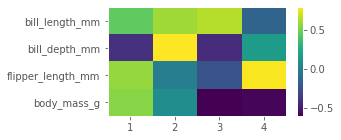

In [25]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Una vez calculadas las componentes principales, se puede conocer la varianza explicada por cada una de ellas, la proporción respecto al total y la proporción de varianza acumulada. Esta información está almacenada en los atributos explained_variance_ y explained_variance_ratio_ del modelo.

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.68843878 0.19312919 0.09130898 0.02712305]


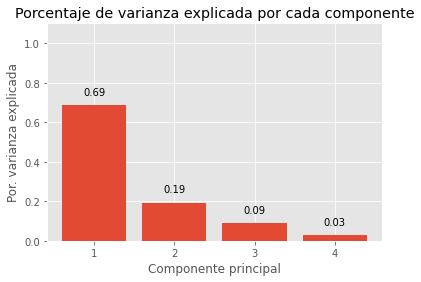

In [26]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

En este caso, la primera componente explica el 62% de la varianza observada en los datos y la segunda el 24.7%. Las dos últimas componentes no superan por separado el 1% de varianza explicada.

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.68843878 0.88156797 0.97287695 1.        ]


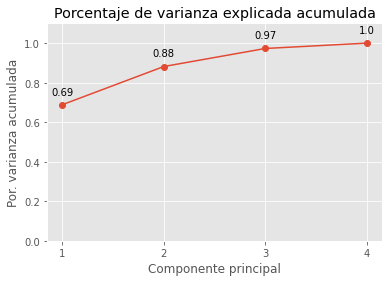

In [27]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(datos.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Si se empleasen únicamente las dos primeras componentes se conseguiría explicar el 87% de la varianza observada.

Trasformación


Una vez entrenado el modelo, con el método transform() se puede reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes.

In [28]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=datos)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4'],
    index   = datos.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4
0,-1.843445,0.047702,-0.232794,-0.523903
1,-1.306762,-0.428348,-0.029562,-0.402426
2,-1.369181,-0.154476,0.198672,0.528007
4,-1.878827,-0.002048,-0.618596,0.478378
5,-1.911748,0.829210,-0.686584,0.207428


La transformación es el resultado de multiplicar los vectores que definen cada componente con el valor de las variables. Puede calcularse de forma manual:

In [29]:
proyecciones = np.dot(modelo_pca.components_, scale(datos).T)
proyecciones = pd.DataFrame(proyecciones, index = ['PC1', 'PC2', 'PC3', 'PC4'])
proyecciones = proyecciones.transpose().set_index(datos.index)
proyecciones.head()

,PC1,PC2,PC3,PC4
0,-1.843445,0.047702,-0.232794,-0.523903
1,-1.306762,-0.428348,-0.029562,-0.402426
2,-1.369181,-0.154476,0.198672,0.528007
4,-1.878827,-0.002048,-0.618596,0.478378
5,-1.911748,0.829210,-0.686584,0.207428


Reconstrucción


Puede revertirse la transformación y reconstruir el valor inicial con el método inverse_transform(). Es importante tener en cuenta que, la reconstrucción, solo será completa si se han incluido todas las componentes.

In [30]:
# Recostruccion de las proyecciones
# ==============================================================================
recostruccion = pca_pipe.inverse_transform(X=proyecciones)
recostruccion = pd.DataFrame(
                    recostruccion,
                    columns = datos.columns,
                    index   = datos.index
)
print('------------------')
print('Valores originales')
print('------------------')
display(recostruccion.head())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(datos.head())

------------------
Valores originales
------------------


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


---------------------
Valores reconstruidos
---------------------


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
